In [2]:
#importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np

In [3]:
#carregando a base de dados
database = pd.read_csv('notas_alunos.csv')

#visualizando as 10 primeiras instâncias da base de dados
database.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


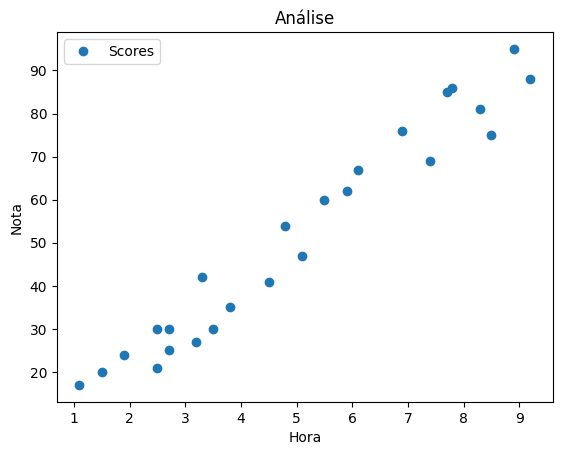

In [5]:
#analisando a correlação dos dados
database.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Análise')
plt.xlabel('Hora')
plt.ylabel('Nota')
plt.show()

In [10]:
#separando as variáveis explicativas da classe
X = database['Hours'].array.reshape(-1, 1)
y = database['Scores']

In [11]:
#separando o conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [12]:
#treinando o modelo preditivo Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#avaliando o modelo preditivo
y_pred = model.predict(X_test)
output = pd.DataFrame({'Verdadeiro': y_test, 'Predito': y_pred})
output

,Verdadeiro,Predito
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [17]:
#apresentanto os coeficientes do modelo preditivo
model.intercept_, model.coef_

(2.826892353899737, array([9.68207815]))

In [18]:
#usando a equação da reta: y = mx + b
pred = model.coef_ * X_test + model.intercept_
pred

<PandasArray>
[
[83.18814103588203],
[27.03208774003898],
[27.03208774003898],
[69.63323161964405],
[59.951153465188355]
]
Shape: (5, 1), dtype: float64

In [16]:
#avaliando os resultados obtidos
print('Erro médio absoluto: ', metrics.mean_absolute_error(y_test, y_pred))
print('Erro médio quadrático: ', metrics.mean_squared_error(y_test, y_pred))
print('Raiz do erro médio quadrático: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinação ou R quadrado: ', metrics.r2_score(y_test, y_pred))

Erro médio absoluto:  3.9207511902099244
Erro médio quadrático:  18.943211722315272
Raiz do erro médio quadrático:  4.352380006653288
Coeficiente de determinação ou R quadrado:  0.9678055545167994
